# Transformada discreta de Fourier (DFT)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Definindo a transformada

Dado um sinal representado por um array $f$. A DFT do sinal é calculada através da equação:

\begin{equation}
F_m = \sum_{n=0}^{M-1}f_ne^{-2\pi imn/M}
\end{equation}
onde $M$ é o tamanho do array, $n$ e $m$ são os índices dos arrays $f$ e $F$ (array resultante), e $f_n$ indica o elemento de índice $n$ do array $f$. 

In [2]:
def DFT(fn):
    '''Transformada discreta de Fourier'''
    M = len(fn)
    Fm = np.zeros(M, dtype=complex)
    # Para cada frequência
    for m in range(M):
        # Para cada valor do sinal (instante de tempo, posição espacial, etc)
        for n in range(M):
            Fm[m] += fn[n]*np.exp(-1j*2.*np.pi*m*n/M)

    return Fm

## 2. DFT de um sinal coseno

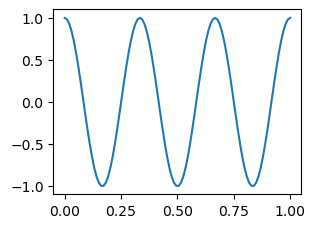

In [3]:
frequency = 3.
x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*frequency*x)
plt.plot(x, y)

In [4]:
# Calcula e imprime a transformada.
Fy = DFT(y)
print(Fy)

[ 1.00000000e+00+0.00000000e+00j  1.12147087e+00+3.52436418e-02j
  1.76713595e+00+1.11178770e-01j  4.99542138e+01+4.72206349e+00j
 -1.33283751e+00-1.68376534e-01j -5.71034048e-01-9.04429082e-02j
 -3.34344165e-01-6.37795605e-02j -2.23229390e-01-4.98976805e-02j
 -1.60512490e-01-4.12126028e-02j -1.21109089e-01-3.51854430e-02j
 -9.45317559e-02-3.07152294e-02j -7.56696829e-02-2.72427622e-02j
 -6.17581967e-02-2.44517998e-02j -5.11833308e-02-2.21490051e-02j
 -4.29462704e-02-2.02089808e-02j -3.63996260e-02-1.85465358e-02j
 -3.11076806e-02-1.71015921e-02j -2.67678492e-02-1.58304619e-02j
 -2.31643592e-02-1.47005494e-02j -2.01398062e-02-1.36869981e-02j
 -1.75770776e-02-1.27704944e-02j -1.53875195e-02-1.19357836e-02j
 -1.35029878e-02-1.11706430e-02j -1.18703860e-02-1.04651530e-02j
 -1.04478356e-02-9.81117072e-03j -9.20194246e-03-9.20194246e-03j
 -8.10581254e-03-8.63181363e-03j -7.13759206e-03-8.09600900e-03j
 -6.27937764e-03-7.59046365e-03j -5.51639341e-03-7.11169153e-03j
 -4.83636266e-03-6.656682

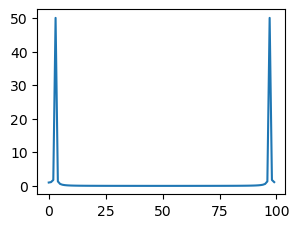

In [5]:
# plota a transformada. Note que os valores de Fy são complexos, 
# então para plotar precisamos calcular o valor absoluto
plt.plot(np.abs(Fy))

Note que Fy possui apenas as amplitudes das frequências do sinal. Isto é, ainda não conhecemos a frequência associada a cada amplitude. Tais frequências serão calculadas abaixo.

## 2. Calculando as frequências

O array Fy calculado acima possui as magnitudes da transformada de Fourier, mas não tem qualquer informação sobre as frequências associadas a cada magnitude. Para calcular as frequências, utilizamos o teorema de Nyquist, que revela que a maior frequência do sinal que podemos representar é dada por

\begin{equation}
f_{max}=\frac{1}{2\Delta x}
\end{equation}
onde $\Delta x$ é o intervalo de amostragem da função (por exemplo, um sinal amostrado a cada 0.1 segundo).
Como o domínio da frequência da transformada de fourier tem a parte negativa, o intervalo de frequências da transformada começa em $-f_{max}$ e termina em $f_{max}$. Portanto, o intervalo total a ser utilizado é $2f_{max}$. As frequências são então divididas em $M$ valores, onde $M$ é o tamanho do array do sinal de entrada. Ou seja, a frequência possui incrementos dados por $\Delta f=2f_{max}/M$.

Outro detalhe é que a saída da DFT possui uma ordenação peculiar das frequências. Supondo que as frequências que queremos representar são dadas por [-3, -2, -1, 0, 1, 2, 3], o resultado da DFT é um array onde cada elemento é relativo ás seguintes frequências: [0, 1, 2, 3, -3, -2, -1]. Se o tamanho do sinal for par, as frequências são [0, 1, 2, -3, -2, -1].

In [6]:
def DFT_frequency(x):
    
    M = len(x)
    delta_x = x[1]-x[0]     # Intervalo de amostragem
    fMax = 1/(2*delta_x)    # Máxima frequência a ser representada (teorema de Nyquist)
    f_interval = 2*fMax     # Intervalo total de frequências a ser dividido
    delta_f = f_interval/M  # Diferença de frequências entre posições consecutivas do array
    
    if M%2==0:
        halfM = M//2
        negative_frequencies = np.arange(-halfM, 0)*delta_f
        positive_frequencies = np.arange(0, halfM)*delta_f
    else:
        halfM = (M-1)//2
        negative_frequencies = np.arange(-halfM, 0)*delta_f
        positive_frequencies = np.arange(0, halfM+1)*delta_f
    frequencies = np.concatenate((positive_frequencies, negative_frequencies))
        
    # O array frequencies possui as seguintes frequências:
    #frequencies = [0, 1, ...,   M/2-1,     -M/2, ..., -1] * delta_f   se M for par
    #frequencies = [0, 1, ..., (M-1)/2, -(M-1)/2, ..., -1] * delta_f   se M for ímpar
    
    return frequencies

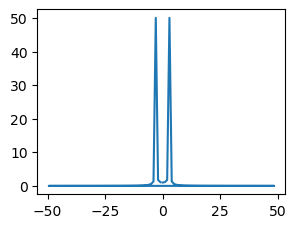

In [7]:
# Podemos agora calcular a DFT e plotá-la com as frequências
signal_frequency = 3.
x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*signal_frequency*x)
Fy = DFT(y)
freqs = DFT_frequency(x)
plt.plot(freqs, np.abs(Fy))

In [8]:
# Em Python, podemos implementar uma DFT mais eficiente utilizando funções numpy
def DFT_faster(fn):

    M = len(fn)
    n_array = np.tile(range(M), reps=(M, 1))
    m_array = np.arange(M).reshape(M, 1)
    indices = n_array*m_array
    coef_matrix = np.exp(-1j*2.*np.pi*indices/M)

    Fm = np.dot(coef_matrix, fn)

    return Fm

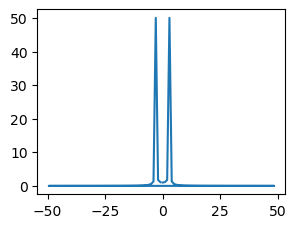

In [9]:
# Podemos tabém fazer as mesmas operações utilizando funções do scipy
from scipy.fftpack import fft, fftfreq

Fy_scipy = fft(y)
freqs_scipy = fftfreq(len(x), x[1]-x[0])
plt.plot(freqs_scipy, np.abs(Fy_scipy))


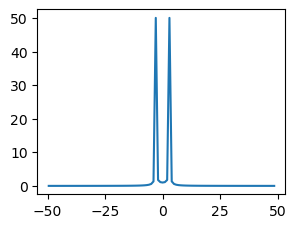

In [10]:
# A função fftshift do scipy reorganiza os valores do array de forma que as frequências fiquem em uma ordem mais intuitiva:
# [-M/2, ..., -1, 0, 1, ...,   M/2] * delta_f 
from scipy.fftpack import fftshift

Fy_scipy = fftshift(Fy_scipy)
freqs_scipy = fftshift(freqs_scipy)
plt.plot(freqs_scipy, np.abs(Fy_scipy))